## Problem_Statement

- The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\hp\Downloads\archive (62)\car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
## Target Varible :- Present_Price

In [5]:
df.shape

(301, 9)

In [6]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [7]:
# 5 point summary for numerical variable.

df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.select_dtypes(include='object').describe()

,Car_Name,Fuel_Type,Selling_type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [9]:
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print('------------------------')

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64
------------------------
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
------------------------
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
------------------------
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
------------------------


In [10]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

## Multicolinearity

<Axes: >

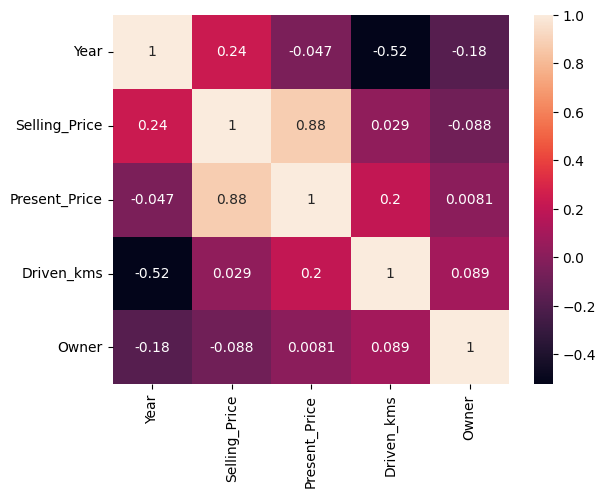

In [11]:
import seaborn as sns

sns.heatmap(df.select_dtypes(exclude='object').corr(),annot=True)

- There is an high corelation between selling price and present price

In [12]:
df.isnull().sum()

# There is no null values in the dataset

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

## Feature Engineering

- Feature engineering in this context is important because it helps to simplify and organize the data by separating vehicles into two main categories: two-wheelers and four-wheelers. This distinction can make the data easier to analyze and model, as vehicles with different types (e.g., bikes vs. cars) typically have different characteristics and use cases. By creating these categories, we reduce complexity, improve interpretability, and enable machine learning models to learn patterns more effectively based on vehicle type. It also allows for more targeted insights in analyses related to vehicle types.








In [13]:
import pandas as pd

vehicles = ['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza', 's cross', 
            'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis', '800', 'baleno', 
            'omni', 'fortuner', 'innova', 'corolla altis', 'etios cross', 'etios g', 
            'etios liva', 'corolla', 'etios gd', 'camry', 'land cruiser', 
            'Royal Enfield Thunder 500', 'UM Renegade Mojave', 'KTM RC200', 
            'Bajaj Dominar 400', 'Royal Enfield Classic 350', 'KTM RC390', 
            'Hyosung GT250R', 'Royal Enfield Thunder 350', 'KTM 390 Duke ', 
            'Mahindra Mojo XT300', 'Bajaj Pulsar RS200', 'Royal Enfield Bullet 350', 
            'Royal Enfield Classic 500', 'Bajaj Avenger 220', 'Bajaj Avenger 150', 
            'Honda CB Hornet 160R', 'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160', 
            'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme', 'Bajaj Avenger 220 dtsi', 
            'Bajaj Avenger 150 street', 'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 
            'Bajaj Pulsar 220 F', 'TVS Apache RTR 180', 'Hero Passion X pro', 
            'Bajaj Pulsar NS 200', 'Yamaha Fazer ', 'Honda Activa 4G', 'TVS Sport ', 
            'Honda Dream Yuga ', 'Bajaj Avenger Street 220', 'Hero Splender iSmart', 
            'Activa 3g', 'Hero Passion Pro', 'Honda CB Trigger', 'Yamaha FZ S ', 
            'Bajaj Pulsar 135 LS', 'Activa 4g', 'Honda CB Unicorn', 'Hero Honda CBZ extreme', 
            'Honda Karizma', 'Honda Activa 125', 'TVS Jupyter', 'Hero Honda Passion Pro', 
            'Hero Splender Plus', 'Honda CB Shine', 'Bajaj Discover 100', 'Suzuki Access 125', 
            'TVS Wego', 'Honda CB twister', 'Hero Glamour', 'Hero Super Splendor', 
            'Bajaj Discover 125', 'Hero Hunk', 'Hero  Ignitor Disc', 'Hero  CBZ Xtreme', 
            'Bajaj  ct 100', 'i20', 'grand i10', 'i10', 'eon', 'xcent', 'elantra', 
            'creta', 'verna', 'city', 'brio', 'amaze', 'jazz']

# lists for two-wheelers and four-wheelers
two_wheelers = ['Royal Enfield Thunder 500', 'UM Renegade Mojave', 'KTM RC200', 
                'Bajaj Dominar 400', 'Royal Enfield Classic 350', 'KTM RC390', 
                'Hyosung GT250R', 'Royal Enfield Thunder 350', 'KTM 390 Duke', 
                'Mahindra Mojo XT300', 'Bajaj Pulsar RS200', 'Royal Enfield Bullet 350', 
                'Royal Enfield Classic 500', 'Bajaj Avenger 220', 'Bajaj Avenger 150', 
                'Honda CB Hornet 160R', 'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 
                'TVS Apache RTR 160', 'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme', 
                'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street', 'Yamaha FZ v 2.0', 
                'Bajaj Pulsar NS 200', 'Bajaj Pulsar 220 F', 'TVS Apache RTR 180', 
                'Hero Passion X pro', 'Yamaha Fazer', 'Honda Activa 4G', 'TVS Sport', 
                'Honda Dream Yuga', 'Bajaj Avenger Street 220', 'Hero Splender iSmart', 
                'Activa 3g', 'Hero Passion Pro', 'Honda CB Trigger', 'Yamaha FZ S', 
                'Bajaj Pulsar 135 LS', 'Honda CB Unicorn', 'Hero Honda CBZ extreme', 
                'Honda Karizma', 'Honda Activa 125', 'TVS Jupyter', 'Hero Honda Passion Pro', 
                'Hero Splender Plus', 'Honda CB Shine', 'Bajaj Discover 100', 'Suzuki Access 125', 
                'TVS Wego', 'Honda CB twister', 'Hero Glamour', 'Hero Super Splendor', 
                'Bajaj Discover 125', 'Hero Hunk', 'Hero Ignitor Disc', 'Hero CBZ Xtreme', 
                'Bajaj ct 100']

four_wheelers = ['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza', 
                 's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis', 
                 '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis', 
                 'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd', 
                 'camry', 'land cruiser', 'i20', 'grand i10', 'i10', 'eon', 
                 'xcent', 'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 
                 'jazz']

car_types = []


for i in df['Car_Name']:
    if i in two_wheelers:
        car_types.append('Two-Wheeler')
    else:
        car_types.append('Four-Wheeler')


df['Car_type'] = car_types

print(df.head())




  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner      Car_type  
0       Dealer       Manual      0  Four-Wheeler  
1       Dealer       Manual      0  Four-Wheeler  
2       Dealer       Manual      0  Four-Wheeler  
3       Dealer       Manual      0  Four-Wheeler  
4       Dealer       Manual      0  Four-Wheeler  


In [14]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_type
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Four-Wheeler
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Four-Wheeler
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Four-Wheeler
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Four-Wheeler
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Four-Wheeler


## Visualization

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

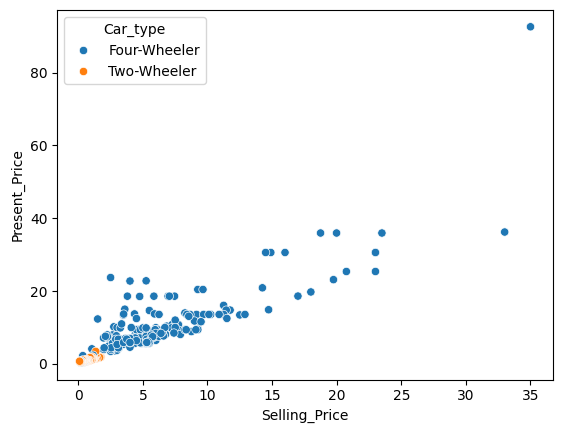

In [15]:
import seaborn as sns

sns.scatterplot(data=df,x='Selling_Price',y='Present_Price',hue='Car_type')

<Axes: xlabel='Fuel_Type,Transmission'>

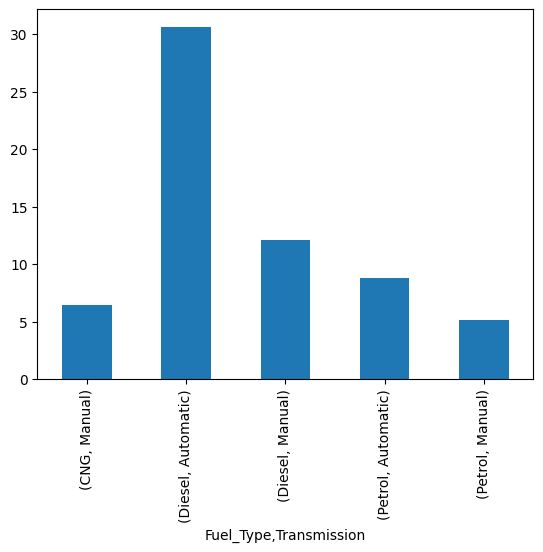

In [16]:
df.groupby(['Fuel_Type','Transmission'])['Present_Price'].mean().plot(kind='bar')

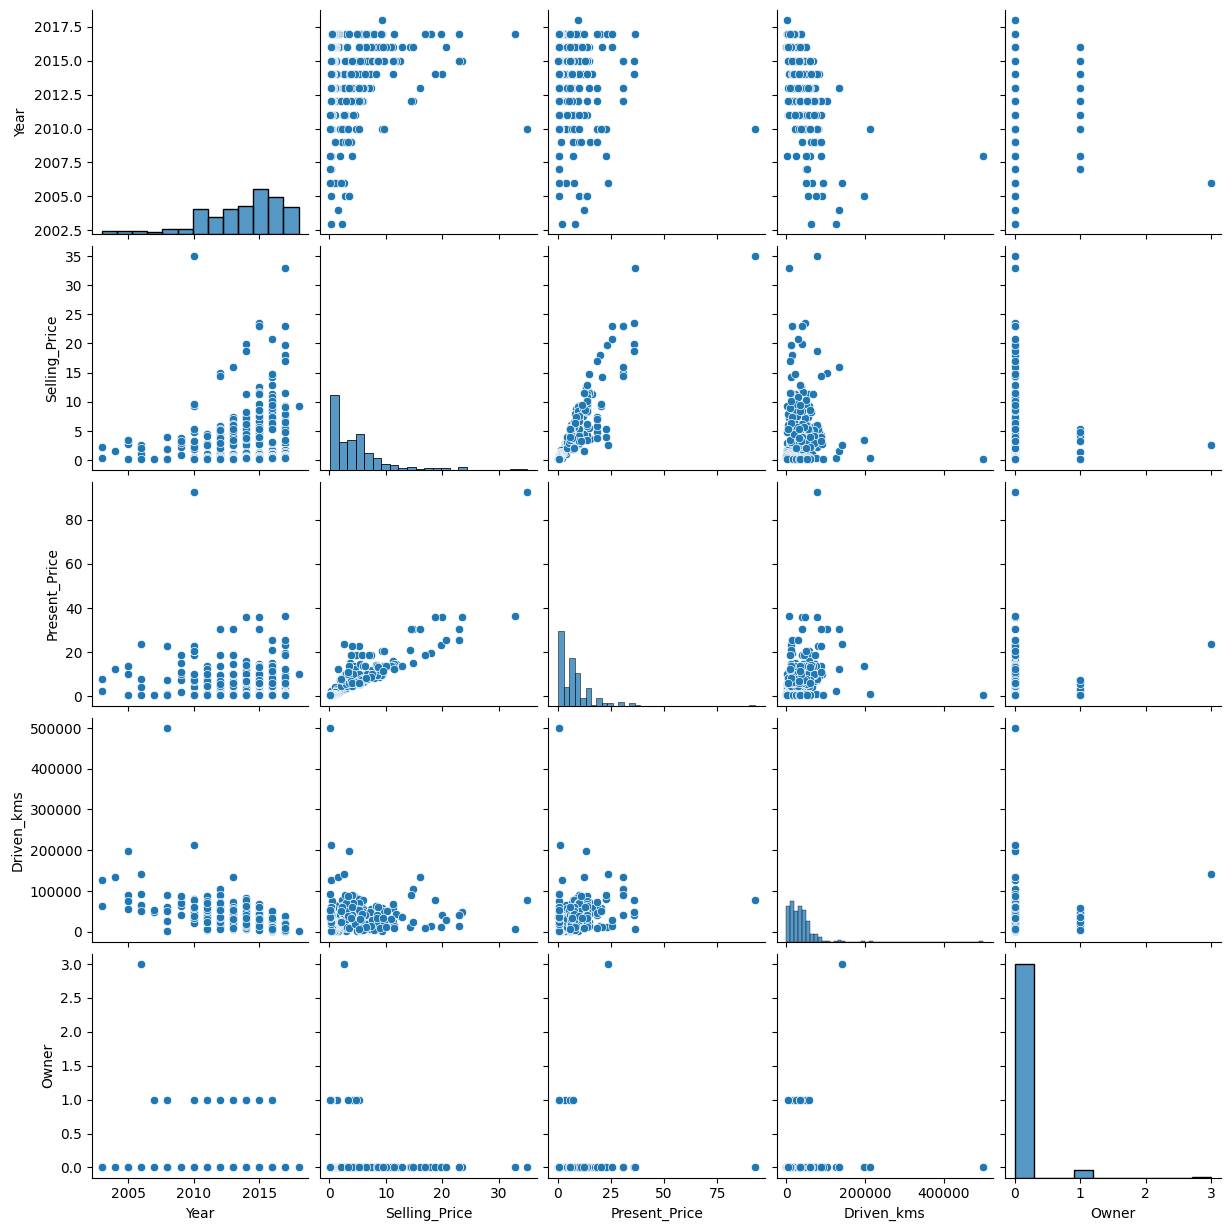

In [17]:
sns.pairplot(df)

In [18]:
df.drop('Car_Name',axis=1,inplace=True)

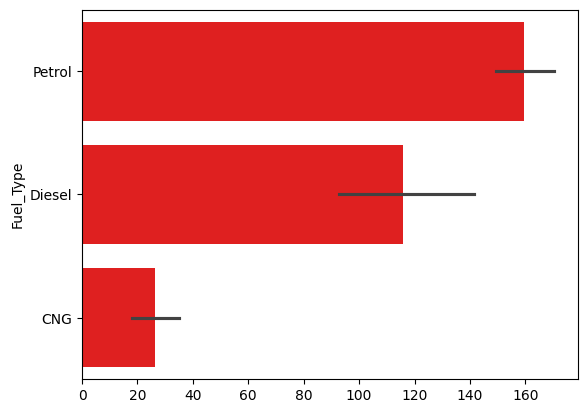

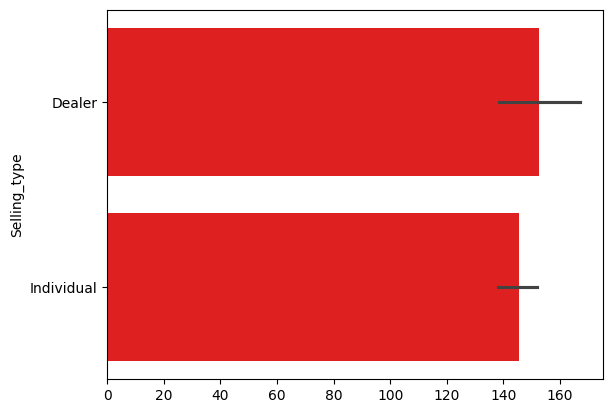

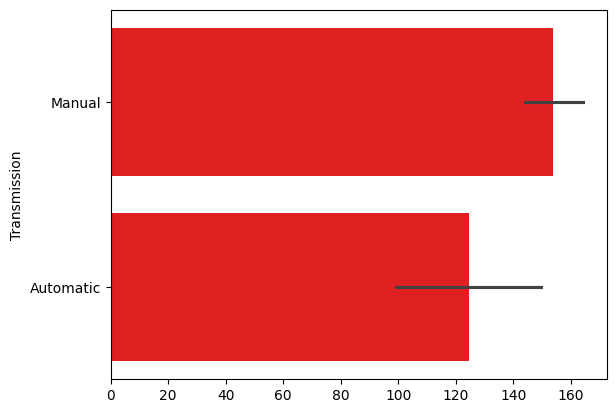

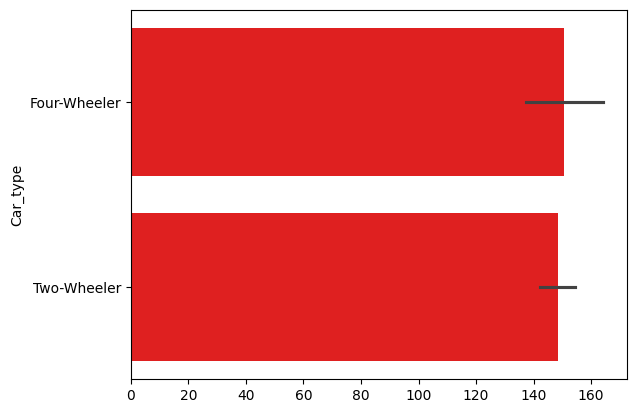

In [19]:
import matplotlib.pyplot as plt

for i in df.select_dtypes(include='object').columns:
    sns.barplot(df[i],color='red')
    plt.show()

## Outliers

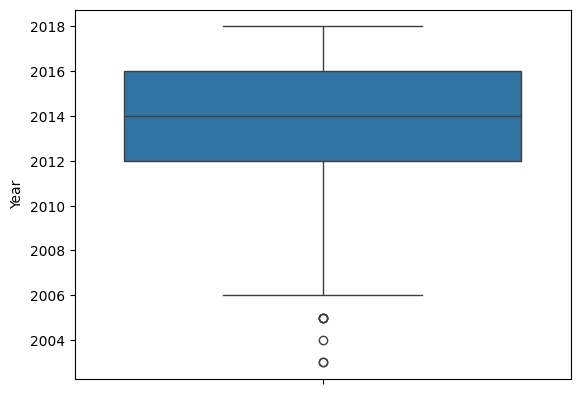

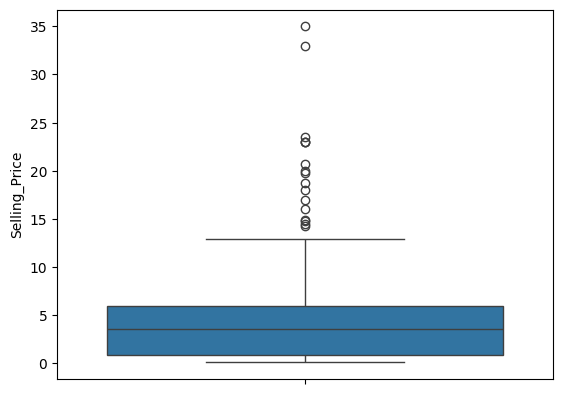

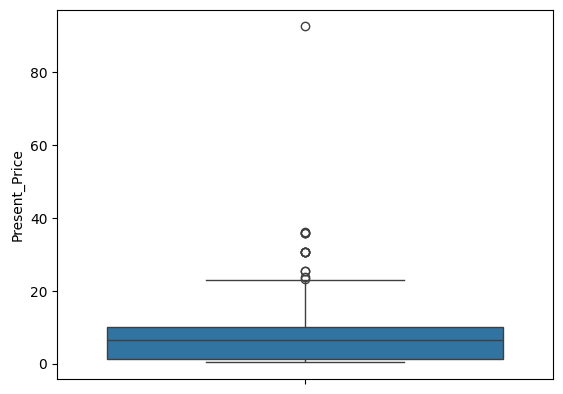

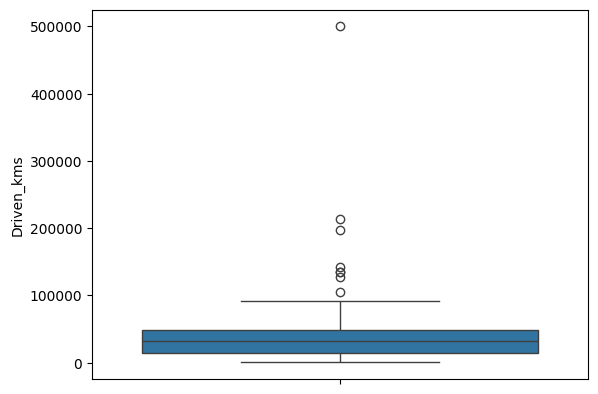

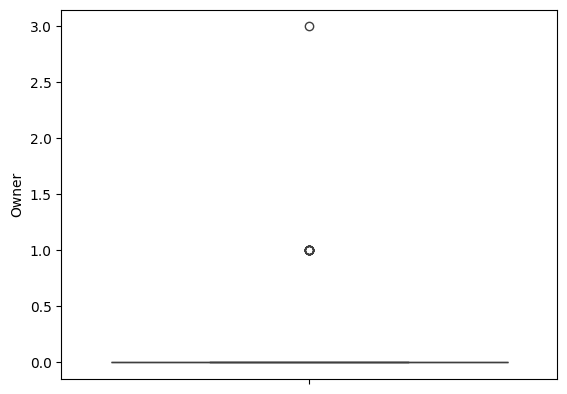

In [20]:
for i in df.select_dtypes(exclude='object'):
    sns.boxplot(df[i])
    plt.show()

- we do not do any outlier treatment here because we have very less data to explore so we avoid outlier treatment

## Encoding

In [21]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_type
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Four-Wheeler
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Four-Wheeler
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Four-Wheeler
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Four-Wheeler
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Four-Wheeler


In [22]:
df = pd.get_dummies(data=df,columns=['Fuel_Type','Selling_type','Transmission','Car_type'],dtype='int')

In [23]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual,Car_type_Four-Wheeler,Car_type_Two-Wheeler
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1,1,0
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1,1,0
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1,1,0
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1,1,0
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1,1,0


## Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Selling_type_Dealer', 'Selling_type_Individual',
       'Transmission_Automatic', 'Transmission_Manual',
       'Car_type_Four-Wheeler', 'Car_type_Two-Wheeler'],
      dtype='object')

In [26]:
df_scale = df[['Year', 'Selling_Price', 'Driven_kms', 'Owner']]

In [27]:
df.dtypes

Year                         int64
Selling_Price              float64
Present_Price              float64
Driven_kms                   int64
Owner                        int64
Fuel_Type_CNG                int32
Fuel_Type_Diesel             int32
Fuel_Type_Petrol             int32
Selling_type_Dealer          int32
Selling_type_Individual      int32
Transmission_Automatic       int32
Transmission_Manual          int32
Car_type_Four-Wheeler        int32
Car_type_Two-Wheeler         int32
dtype: object

In [28]:
MinMax = MinMaxScaler()

for i in df_scale:
    df[i] = MinMax.fit_transform(df[[i]])
    

In [29]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual,Car_type_Four-Wheeler,Car_type_Two-Wheeler
0,0.733333,0.093123,5.59,0.053053,0.0,0,0,1,1,0,0,1,1,0
1,0.666667,0.133238,9.54,0.085085,0.0,0,1,0,1,0,0,1,1,0
2,0.933333,0.204871,9.85,0.012813,0.0,0,0,1,1,0,0,1,1,0
3,0.533333,0.078797,4.15,0.009409,0.0,0,0,1,1,0,0,1,1,0
4,0.733333,0.128940,6.87,0.083984,0.0,0,1,0,1,0,0,1,1,0


## Model Building

### RandomForestRegressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

X = df.drop('Present_Price',axis=1)
Y = df['Present_Price']


xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.70,random_state=100)

rf = RandomForestRegressor()
rf_model = rf.fit(xtrain,ytrain)
train_pred = rf_model.predict(xtrain)
test_pred = rf_model.predict(xtest)

print('train_error:',mean_absolute_percentage_error(ytrain,train_pred)*100)
print('test_error:',mean_absolute_percentage_error(ytest,test_pred)*100)




train_error: 6.195428770475405
test_error: 16.520392935729657


## Cross_Validation

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Create the scorer for MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error)


cross_validation = cross_val_score(estimator=rf,X=X,y=Y,scoring=mape_scorer,cv=5)

cross_validation

array([0.1709223 , 0.22040796, 0.53904242, 0.34459579, 0.12968554])

### LinearRegression

In [32]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR_model = LR.fit(xtrain,ytrain)
train_pred = LR_model.predict(xtrain)
test_pred = LR_model.predict(xtest)

print('train_error:',mean_absolute_percentage_error(ytrain,train_pred)*100)
print('test_error:',mean_absolute_percentage_error(ytest,test_pred)*100)



train_error: 94.16954863216269
test_error: 93.00094153942118


In [33]:
# 3. Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=100)
gbr_model = gbr.fit(xtrain, ytrain)
train_pred = gbr_model.predict(xtrain)
test_pred = gbr_model.predict(xtest)

print('train_error:',mean_absolute_percentage_error(ytrain,train_pred)*100)
print('test_error:',mean_absolute_percentage_error(ytest,test_pred)*100)



train_error: 9.695972906028386
test_error: 22.128607655165492
